导入包

In [1]:
import matplotlib.pyplot as plt
# 显示中文设置字体
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
import numpy as np

激活函数sigmoid定义

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

Text(0, 0.5, 'y(x)')

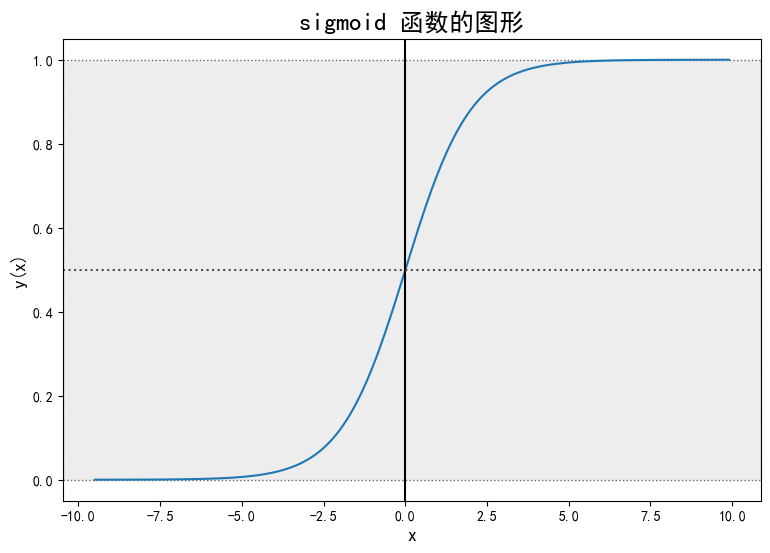

In [3]:
x = np.arange(-9.5, 10, 0.1)
y = sigmoid(x)
plt.figure(figsize=(9, 6))
plt.plot(x, y)
plt.axvline(0, c='black')
plt.axhspan(.0, 1.0, facecolor='0.93', alpha=1.0, ls=':', edgecolor='0.4')
plt.axhline(y=.5, color='.3',alpha=1.0, ls=':')
plt.title('sigmoid 函数的图形', fontsize=18)
plt.xlabel('x', fontsize=13)
plt.ylabel('y(x)', fontsize=13)


[logistics公式推理](https://juejin.cn/post/7057447537757650957#heading-7)

[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

[安德森鸢尾花卉数据集](https://zh.wikipedia.org/wiki/%E5%AE%89%E5%BE%B7%E6%A3%AE%E9%B8%A2%E5%B0%BE%E8%8A%B1%E5%8D%89%E6%95%B0%E6%8D%AE%E9%9B%86)

In [4]:
from sklearn import datasets

In [5]:
iris = datasets.load_iris()

In [6]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
X = iris.data
y = iris.target

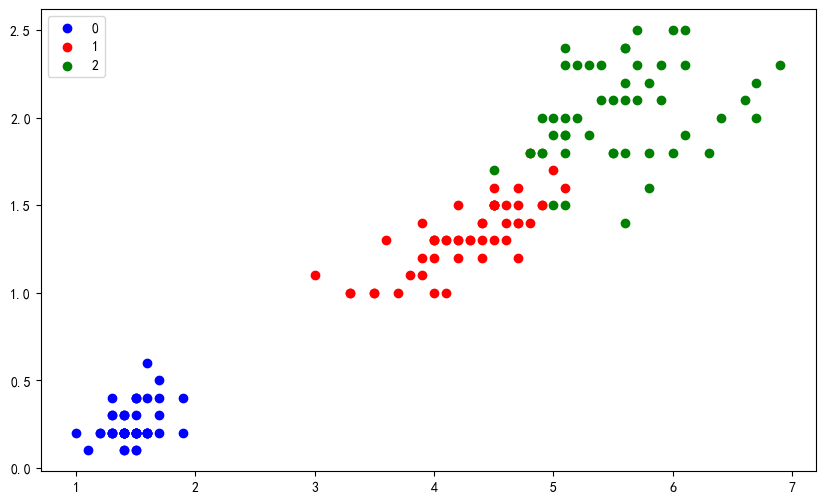

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 2], X[y == 0][:, 3], color='b', label='0')
plt.scatter(X[y == 1][:, 2], X[y == 1][:, 3], color='r', label='1')
plt.scatter(X[y == 2][:, 2], X[y == 2][:, 3], color='g', label='2')

plt.legend();

### Normalizing Data

In layman term, we do normalization to improve the overall performance of the model by minimizing the features values in the range between 0 to 1. You can read little more about normalization [here](https://stats.stackexchange.com/a/70807/241387).

In [11]:
import pandas as pd

In [17]:
df = pd.DataFrame(X, columns=["sl", "sw", "pl", "pw"])
df.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
df.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df_norm  = df.apply(lambda x: (x - x.min())/(x.max() - x.min()))
df_norm.head()

,sl,sw,pl,pw
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [19]:
df_norm.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [26]:
df_norm["label"] = y
df_norm.head()

,sl,sw,pl,pw,label
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [31]:
df_norm = df_norm.sample(frac=1)
df_norm.head()

,sl,sw,pl,pw,label
103,0.555556,0.375000,0.779661,0.708333,2
116,0.611111,0.416667,0.762712,0.708333,2
135,0.944444,0.416667,0.864407,0.916667,2
0,0.222222,0.625000,0.067797,0.041667,0
99,0.388889,0.333333,0.525424,0.500000,1


In [32]:
np.random.seed(9)
mask = np.random.rand(len(df_norm)) < 0.8

df_train = df_norm[mask]
df_test = df_norm[~mask]

In [33]:
df_train.shape

(119, 5)

In [34]:
df_test.shape

(31, 5)

In [35]:
df_train.head()

,sl,sw,pl,pw,label
103,0.555556,0.375000,0.779661,0.708333,2
116,0.611111,0.416667,0.762712,0.708333,2
135,0.944444,0.416667,0.864407,0.916667,2
0,0.222222,0.625000,0.067797,0.041667,0
99,0.388889,0.333333,0.525424,0.500000,1


In [36]:
X = df_train.values[:,:4]
X[:5]

array([[0.55555556, 0.375     , 0.77966102, 0.70833333],
       [0.61111111, 0.41666667, 0.76271186, 0.70833333],
       [0.94444444, 0.41666667, 0.86440678, 0.91666667],
       [0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.38888889, 0.33333333, 0.52542373, 0.5       ]])

## Backpropogating Neural Network

**The neural network that we will create will have 3 layers:**
* Input Layer
* Hidden Layer
* Output Layer


1. **Input Layer**: This layer will consist of 4 nodes as we have 4 features Sepal Length, Sepal Width, Petal Length, PetalWidth.
2. **Output Layer**: This layer will consist of 3 nodes as we have to classify between 3 outputs only. So if the value of output layer is 1,0,0 that means the prediction is Iris-setosa or if the output value is 0,1,0 then prediction will be Iris-versicolor.

> `w1` will be a matrix that contains the weights of each connecting layer between Input nodes and Hidden nodes. The values of weights will range from -1 to 1 with an overall mean of 0.

## Train the network by updating weights using Back Propagation Algorithm

The two main important parts of traning our neural network is:
1. Forward Propagation
2. Back Propagation


#### Forward Propagation ( use current weights to caluculate output ):
* In Forward Propogation, we calculate the values of nodes present in the hidden layer using the weight matix (w1) and input nodes and then calculating the value of output nodes using the hidden layer nodes and weight matrix (w2).

#### Backpropagation ( update network weights ):
* As per my views, I think this is the core of neural network since under this section we update the weight matrix based on the error using gradient discent. After we calculate the output using feed forward network, we will calculate the error in this layer by subtracting the actual output and predicted output and then we will adjust our weight matrix to minimize the error.

<img src="https://i.imgur.com/8PejebM.png" alt="Neural Network" style="width:600px"/>

### Activation Fucntion

In this netwok, we will be using the Sigmoid Activation function. But there are many other activation that you can use. The purpose of activation function is to squash the any value in the range between 0 and 1. We do this to bring non-leniarity in our model so that it can learn more complex function instead of just linear function.

For your learning about activation function, here are the links to [video](https://www.youtube.com/watch?v=NkOv_k7r6no) or [reading](https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f).


In [53]:
class SigmodActivator:
    def forward(self, weight_input):
        return 1.0 / (1.0 + np.exp(-weight_input))
    def backward(self, output):
        return output * (1 - output)

In [54]:
class FullConnectedLayer:
    def __init__(self, input_dim, output_dim, activator):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.activator = activator
        self.weight = np.random.uniform(-0.1, 0.1, (self.output_dim, self.input_dim)) #shape=(output_dim, input_dim)
        self.bias = np.zeros(self.output_dim) #shape=(output_dim,)
    def forward(self, input_array):
        self.input = input_array
        self.output = self.activator.forward(np.dot(self.weight, input_array) + self.bias) #shape=(output_dim,)
    def backward(self, delta_array):
        self.delta = self.activator.backward(self.input) * np.dot(self.weight.T, delta_array)
        self.weight_grad = np.matmul(np.reshape(delta_array, (-1,1)), np.reshape(self.input, (1,-1))) #np.dot(delta_array, self.input.T)
        self.bias_grad = delta_array
    def update(self, learning_rate):
        self.weight += learning_rate * self.weight_grad
        self.bias += learning_rate * self.bias_grad

In [65]:
class Network:
    def __init__(self, layer_nodes):
        self.layers = []
        for i in range(len(layer_nodes) - 1):
            self.layers.append(FullConnectedLayer(layer_nodes[i], layer_nodes[i+1], SigmodActivator()))
    def predict(self, sample):
        output = sample
        for layer in self.layers:
            layer.forward(output)
            output = layer.output
            #print(output.shape)
        return output
    def calc_gradient(self, label):
        #print(self.layers[-1].output.shape)
        #print(label.shape)
        delta = self.layers[-1].activator.backward(self.layers[-1].output) * (label - self.layers[-1].output)
        for layer in self.layers[::-1]:
            layer.backward(delta)
            delta = layer.delta
        return delta
    def update(self, learning_rate):
        for layer in self.layers:
            layer.update(learning_rate)
    def train_one_sample(self, label, sample, learning_rate):
        self.predict(sample)
        self.calc_gradient(label)
        self.update(learning_rate)
    def train(self, labels, data_set, learning_rate, epochs):
        for i in range(epochs):
            for label, sample in zip(labels, data_set):
                self.train_one_sample(label, sample, learning_rate)

In [66]:
def get_result(prob):
    return np.argmax(prob)
def evaluation(network, test_data_set, test_labels):
    error = 0
    total = len(test_data_set)
    for i in range(total):
        label = get_result(test_labels[i])
        pred = get_result(network.predict(test_data_set[i]))
        if label != pred:
            error += 1
    return float(error) / float(total)

In [69]:
from datetime import datetime
train_features, train_labels = df_train.values[:,:4], df_train.values[:,4]
test_features, test_labels = df_test.values[:,:4], df_test.values[:,4]
# train_features, train_labels = np.array(train_features), np.array(train_labels)
# test_features, test_labels = np.array(test_features), np.array(test_labels)
network = Network([4, 5, 3])
learning_curve = []
def train_and_evalutation():
    epochs = 0
    
    last_error_retio = evaluation(network, test_features, test_labels)
    
    while True:
        epochs += 1
        network.train(train_labels, train_features, 0.01, 1)
        print("{} epoch {} finished".format(datetime.now(), epochs))
        error_ratio = evaluation(network, test_features, test_labels)
        learning_curve.append(error_ratio)
        print("{} after epoch {}, test error ratio is {}".format(datetime.now(), epochs, error_ratio))
        if error_ratio > last_error_retio:
            break
        else:
            last_error_retio = error_ratio
        
train_and_evalutation()

2024-10-07 15:38:18.953869 epoch 1 finished
2024-10-07 15:38:18.957105 after epoch 1, test error ratio is 1.0
2024-10-07 15:38:18.964550 epoch 2 finished
2024-10-07 15:38:18.965584 after epoch 2, test error ratio is 1.0
2024-10-07 15:38:18.973115 epoch 3 finished
2024-10-07 15:38:18.973967 after epoch 3, test error ratio is 1.0
2024-10-07 15:38:18.980296 epoch 4 finished
2024-10-07 15:38:18.981068 after epoch 4, test error ratio is 1.0
2024-10-07 15:38:18.988018 epoch 5 finished
2024-10-07 15:38:18.988973 after epoch 5, test error ratio is 1.0
2024-10-07 15:38:18.995118 epoch 6 finished
2024-10-07 15:38:18.995844 after epoch 6, test error ratio is 1.0
2024-10-07 15:38:19.003893 epoch 7 finished
2024-10-07 15:38:19.004702 after epoch 7, test error ratio is 1.0
2024-10-07 15:38:19.011280 epoch 8 finished
2024-10-07 15:38:19.012059 after epoch 8, test error ratio is 1.0
2024-10-07 15:38:19.021017 epoch 9 finished
2024-10-07 15:38:19.022485 after epoch 9, test error ratio is 1.0
2024-10-07

#### Let' see how the value of error decreases with time

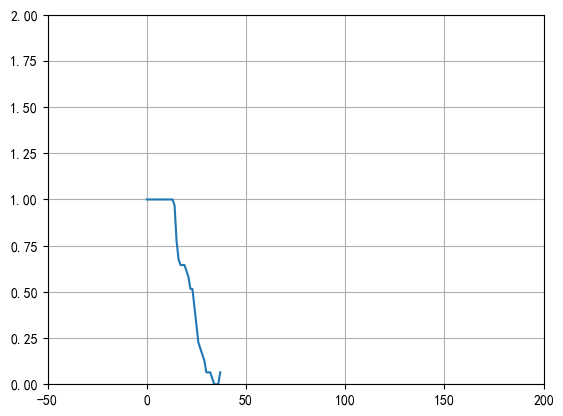

In [70]:
plt.axis([-50, 200, 0, 2])
plt.plot(learning_curve)
plt.grid()

### Test the accuracy of our model
Here we will run the model with the updated weights on our testing data

In [72]:
def accuracy(network, test_data_set, test_labels):
    acc = 0
    total = len(test_data_set)
    for i in range(total):
        label = get_result(test_labels[i])
        pred = get_result(network.predict(test_data_set[i]))
        if label == pred:
            acc += 1
    return float(acc) / float(total)
acc_ratio = accuracy(network, test_features, test_labels)
acc_ratio

0.9354838709677419

### use pytorch

In [73]:
import torch
import torch.nn as nn

In [74]:
X_tr_tensor = torch.tensor(train_features, dtype=torch.float32)
y_tr_tensor = torch.tensor(train_labels, dtype=torch.long)

In [79]:
class FullyConnected(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(4, 5)  # Input layer to 64 neurons
        self.act1 = nn.ReLU()       # ReLU activation function
        self.l2 = nn.Linear(5, 3)  # Output layer to 3 neurons (classes)

    def forward(self, x):
        # Forward pass
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        return x

In [88]:
def fit(model):
    epochs = 3000
    loss_arr = []
    loss_fn = nn.CrossEntropyLoss()
    optim = torch.optim.Adam(model.parameters(), lr=0.002)

    for epoch in range(epochs):
        ypred = model(X_tr_tensor)
        loss = loss_fn(ypred, y_tr_tensor)
        loss_arr.append(loss.item())
        loss.backward()
        optim.step()
        optim.zero_grad()
    plt.plot(loss_arr)
    plt.show()

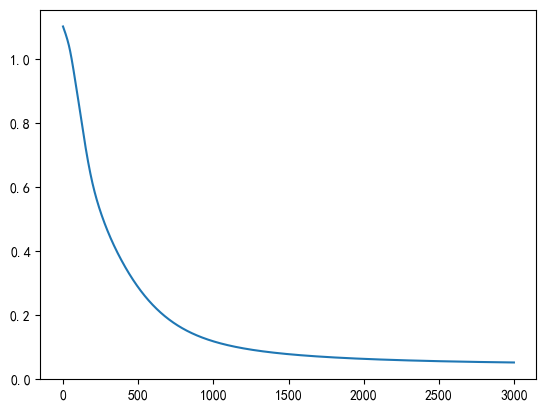

In [89]:
model = FullyConnected()
model.to('cpu')  # Move model to GPU
X_tr_tensor = X_tr_tensor.to('cpu')  # Move tensors to GPU
y_tr_tensor = y_tr_tensor.to('cpu')
fit(model)

In [94]:
X_ts_tensor = torch.tensor(test_features, dtype=torch.float32).to('cpu')
ytest_pred = model(X_ts_tensor)
newytest = torch.argmax(ytest_pred, dim=1)

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score, recall_score, f1_score, roc_auc_score


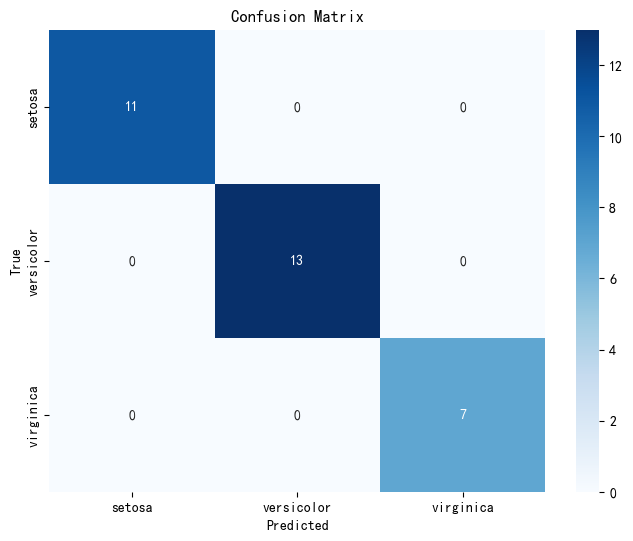

In [97]:
import seaborn as sns

confused_matrix = confusion_matrix(test_labels, newytest)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confused_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [95]:
# Already added in main code so do not need to re-write:
precision = precision_score(test_labels, newytest, average='weighted')
recall = recall_score(test_labels, newytest, average='weighted')
f1 = f1_score(test_labels, newytest, average='weighted')

# Just print the statement below:
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [96]:
print(newytest[:40])
print(test_labels[:40])

tensor([1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2,
        0, 0, 1, 2, 0, 2, 0])
[1. 2. 1. 1. 1. 1. 2. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 2. 1. 2. 2.
 0. 0. 1. 2. 0. 2. 0.]


In [30]:
1/(1+np.exp(-1.83))

0.861761726827506